# Bài tập 4 - Sử dụng Cross Correlation để phát hiện mẫu cho trước

Sử dụng thuật toán Cross correlation ở Bài tập 3 để **đếm** số mẫu trong ảnh:

**Bước 1.** Sử dụng hàm đã cài đặt ở bài tập 3 để truyền ảnh input H (9-ro) và đối tượng mẫu F cần tìm (con rô). 

**Bước 2.** Trực quan hóa kết quả của phép biến đổi cross-correlation giữa H và F.

**Bước 3.** Tìm cách cải tiến để kết quả có thể bất biến với điều kiện ánh sáng môi trường bằng cách chuẩn hóa hình ảnh trước khi thực hiện.

**Bước 4:** Xác định vị trí cực đại hóa tương đồng trên kết quả của phép biến đổi tương đồng, từ đó biết thông tin lá bài này là lá bài gì.

**Chú ý:** hàm **cv2.templateMatching không được sử dụng** trong bài tập này.

**Testcase mẫu:**

Input: 

Ảnh đối tượng cần tìm: 

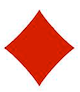

Ảnh mẫu đầu vào: 

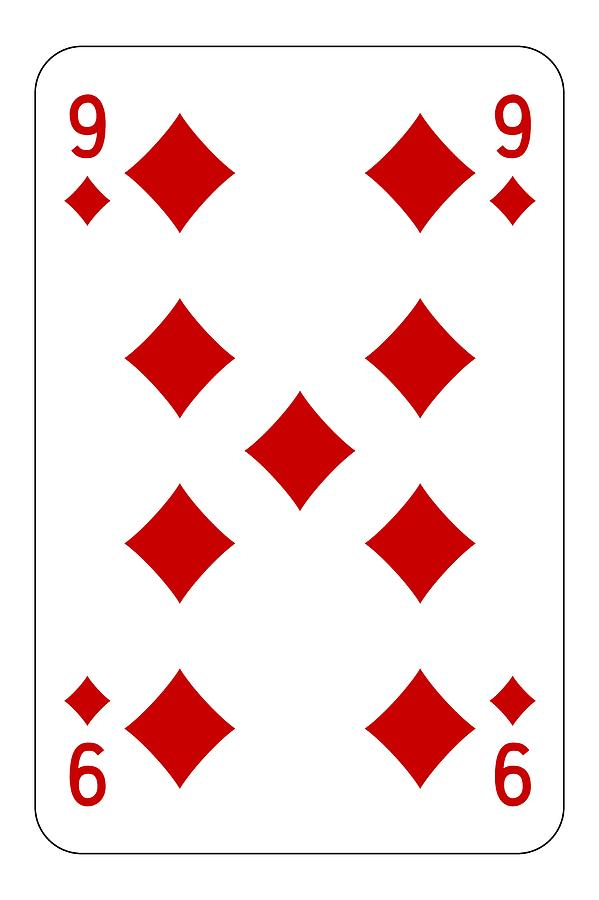


Output: 9


In [13]:
%cd '/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai4'

/content/drive/MyDrive/MyDrive/UIT Documents/SUBJECTS/NHAP MON CV/notebook-cham-diem/Bai4


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def correlation(img, kernel):
    h, w = img.shape
    h_kernel, w_kernel = kernel.shape

    # normalize image and kernel
    img = img / 255.0
    kernel = kernel / 255.0

    margin = w_kernel//2
    final = np.full((h, w), 255)

    for i in range(margin, h-margin):
        for j in range(margin, w-margin):
            ### BEGIN SOLUTION
            result = img[i-margin:i + margin + 1, j-margin:j + margin + 1] * kernel
            final[i, j] = sum(sum(result))
            ### END SOLUTION
            
    return final

In [16]:
def sol(template_path, test_path):
    # 1. Read images
    img = cv2.imread(test_path, 0)
    kernel = cv2.imread(template_path, 0)
    kernel = cv2.resize(kernel, (79,79))


    # 2. Tinh correlation
    corre = correlation(img, kernel)


    # 3. Normalize anh sau khi tinh correlation
    max_vl, min_vl = int(max(map(max, corre))), int(min(map(min, corre)))
    corre = corre.astype("uint8")
    corre = (corre - min_vl) / (max_vl - min_vl) * 255

    # 4. Count object in image
    num_ro = 0
    ### BEGIN SOLUTION
    corre = corre.astype("uint8")
    th, threshed = cv2.threshold(corre, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    
    # findcontours
    cnts = cv2.findContours(threshed, cv2.RETR_LIST, 
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
    

    # filter by area
    s1 = 3 # min square of object
    s2 = 40 # max square of object
    xcnts = []

    for cnt in cnts:
        if s1<cv2.contourArea(cnt) <s2:
            xcnts.append(cnt)
    num_ro = len(xcnts)
    ### END SOLUTION
    return num_ro

In [17]:
# Thử nghiệm với ví dụ của đề bài
print(f"Day la con {sol(template_path='template.png', test_path='9-ro.jpeg')} ro.")

Day la con 9 ro.


In [18]:
# cham diem voi public test
assert sol(template_path='template.png', test_path='9-ro.jpeg') == 9

In [19]:
### BEGIN HIDDEN TESTS

def correlation_for_test(img, kernel):
    h, w = img.shape
    h_kernel, w_kernel = kernel.shape

    # normalize image and kernel
    img = img / 255.0
    kernel = kernel / 255.0

    margin = w_kernel//2
    final = np.full((h, w), 255)

    for i in range(margin, h-margin):
        for j in range(margin, w-margin):
            result = img[i-margin:i + margin + 1, j-margin:j + margin + 1] * kernel
            final[i, j] = sum(sum(result))
            
    return final

def sol_for_test(template_path, test_path):
    # 1. Read images
    img = cv2.imread(test_path, 0)
    kernel = cv2.imread(template_path, 0)
    kernel = cv2.resize(kernel, (79,79))


    # 2. Tinh correlation
    final = correlation_for_test(img, kernel)


    # 3. Normalize anh sau khi tinh correlation
    max_vl, min_vl = int(max(map(max, final))), int(min(map(min, final)))
    final = final.astype("uint8")
    final = (final - min_vl) / (max_vl - min_vl) * 255

    # 4. Count object in image
    num_ro = 0
    final = final.astype("uint8")
    th, threshed = cv2.threshold(final, 100, 255, cv2.THRESH_BINARY|cv2.THRESH_OTSU)
    
    # findcontours
    cnts = cv2.findContours(threshed, cv2.RETR_LIST, 
                        cv2.CHAIN_APPROX_SIMPLE)[-2]
    

    # filter by area
    s1 = 3 # min square of object
    s2 = 40 # max square of object
    xcnts = []

    for cnt in cnts:
        if s1<cv2.contourArea(cnt) <s2:
            xcnts.append(cnt)
    num_ro = len(xcnts)
    return num_ro


assert sol(template_path='template.png', test_path='9-ro.jpeg') == sol_for_test(template_path='template.png', test_path='9-ro.jpeg')
### END HIDDEN TESTS